### Importa los módulos necesarios y establece configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import funs
import seaborn as sns
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


### Importa los nodos y sus respectivos periodos
- Los registros de los nodos se almacenan en un diccionario de dataframes indexado por periodos de medición.

In [2]:
tabla={}
for T in [1,2,3]:
    tabla[T]=[]
    for nodo in [2,3,5]:
        datos = pd.read_csv('nodo%d_periodo%d.csv'%(nodo,T),parse_dates=True,index_col=0)
        datos.columns = [j+str(nodo) for j in datos.columns]
        tabla[T].append(datos.iloc[:,1::])

### Concatena los DFs contenidos 
- Se obtiene un dataframe para cada periodo de medición con la información ordenada de los nodos 2, 3 y 5.

In [3]:
periodo = {}
for T in [1,2,3]:
    periodo[T] = tabla[T][0].join(tabla[T][1], how='outer').join(tabla[T][2], how='outer')
    display(periodo[T].head())

,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-05-09 10:25:00,62.61,18.0,5853.0,29.0,60.20,59.0,5806.0,29.0,80.42,58.0,5829.0,30.0
2018-05-09 10:26:00,62.61,18.0,5853.0,29.0,60.04,58.0,5806.0,29.0,73.20,57.0,5829.0,30.0
2018-05-09 10:27:00,62.45,18.0,5853.0,29.0,59.72,58.0,5841.0,29.0,67.75,57.0,5841.0,30.0
2018-05-09 10:28:00,62.45,18.0,5853.0,30.0,59.72,58.0,5806.0,29.0,63.25,57.0,5824.0,30.0
2018-05-09 10:29:00,62.45,18.0,5859.0,30.0,59.40,57.0,5818.0,30.0,58.92,56.0,5835.0,30.0


,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-05-23 10:08:00,78.50,49.0,5829.0,35.0,98.88,33.0,5788.0,30.0,43.19,35.0,5782.0,30.0
2018-05-23 10:09:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,42.87,35.0,5777.0,30.0
2018-05-23 10:10:00,78.50,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,44.63,35.0,5788.0,30.0
2018-05-23 10:11:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,45.60,35.0,5788.0,30.0
2018-05-23 10:12:00,78.34,49.0,5829.0,35.0,98.56,33.0,5788.0,30.0,44.79,35.0,5794.0,30.0


,HUMEDAD DE LA TIERRA2,HUMEDAD RELATIVA2,INTENSIDAD LUMÍNICA2,TEMPERATURA2,HUMEDAD DE LA TIERRA3,HUMEDAD RELATIVA3,INTENSIDAD LUMÍNICA3,TEMPERATURA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA5,TEMPERATURA5
2018-06-05 10:21:00,8.84,16.0,5841.0,33.0,3.38,24.0,5824.0,33.0,22.81,27.0,5859.0,34.0
2018-06-05 10:22:00,9.16,16.0,5841.0,33.0,3.38,24.0,5824.0,33.0,23.13,27.0,5853.0,34.0
2018-06-05 10:23:00,9.48,16.0,5841.0,33.0,3.38,24.0,5824.0,33.0,22.48,27.0,5853.0,34.0
2018-06-05 10:24:00,11.73,16.0,5835.0,33.0,3.22,24.0,5824.0,33.0,21.84,27.0,5853.0,34.0
2018-06-05 10:25:00,13.82,16.0,5841.0,33.0,3.22,24.0,5824.0,33.0,21.36,27.0,5847.0,34.0


### Ordena las columnas de los dataframes por orden alfabético

In [4]:
for T in periodo:
    periodo[T] = periodo[T].reindex(columns = sorted(periodo[T].columns))
    display('periodo #%d'%T,periodo[T].head())

'periodo #1'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-05-09 10:25:00,62.61,60.20,80.42,18.0,59.0,58.0,5853.0,5806.0,5829.0,29.0,29.0,30.0
2018-05-09 10:26:00,62.61,60.04,73.20,18.0,58.0,57.0,5853.0,5806.0,5829.0,29.0,29.0,30.0
2018-05-09 10:27:00,62.45,59.72,67.75,18.0,58.0,57.0,5853.0,5841.0,5841.0,29.0,29.0,30.0
2018-05-09 10:28:00,62.45,59.72,63.25,18.0,58.0,57.0,5853.0,5806.0,5824.0,30.0,29.0,30.0
2018-05-09 10:29:00,62.45,59.40,58.92,18.0,57.0,56.0,5859.0,5818.0,5835.0,30.0,30.0,30.0


'periodo #2'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-05-23 10:08:00,78.50,98.88,43.19,49.0,33.0,35.0,5829.0,5788.0,5782.0,35.0,30.0,30.0
2018-05-23 10:09:00,78.34,98.56,42.87,49.0,33.0,35.0,5829.0,5788.0,5777.0,35.0,30.0,30.0
2018-05-23 10:10:00,78.50,98.56,44.63,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0
2018-05-23 10:11:00,78.34,98.56,45.60,49.0,33.0,35.0,5829.0,5788.0,5788.0,35.0,30.0,30.0
2018-05-23 10:12:00,78.34,98.56,44.79,49.0,33.0,35.0,5829.0,5788.0,5794.0,35.0,30.0,30.0


'periodo #3'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
2018-06-05 10:21:00,8.84,3.38,22.81,16.0,24.0,27.0,5841.0,5824.0,5859.0,33.0,33.0,34.0
2018-06-05 10:22:00,9.16,3.38,23.13,16.0,24.0,27.0,5841.0,5824.0,5853.0,33.0,33.0,34.0
2018-06-05 10:23:00,9.48,3.38,22.48,16.0,24.0,27.0,5841.0,5824.0,5853.0,33.0,33.0,34.0
2018-06-05 10:24:00,11.73,3.22,21.84,16.0,24.0,27.0,5835.0,5824.0,5853.0,33.0,33.0,34.0
2018-06-05 10:25:00,13.82,3.22,21.36,16.0,24.0,27.0,5841.0,5824.0,5847.0,33.0,33.0,34.0


### Matrices de correlación de las variables para los tres periodos de medición
- Se obtiene una matriz de correlación cruzada de las variables humedad de la tierra, humedad relativa, intensidad lumínica y temperatura de los nodos 2, 3 y 5 para cada periodo de medición.

<Figure size 432x288 with 0 Axes>

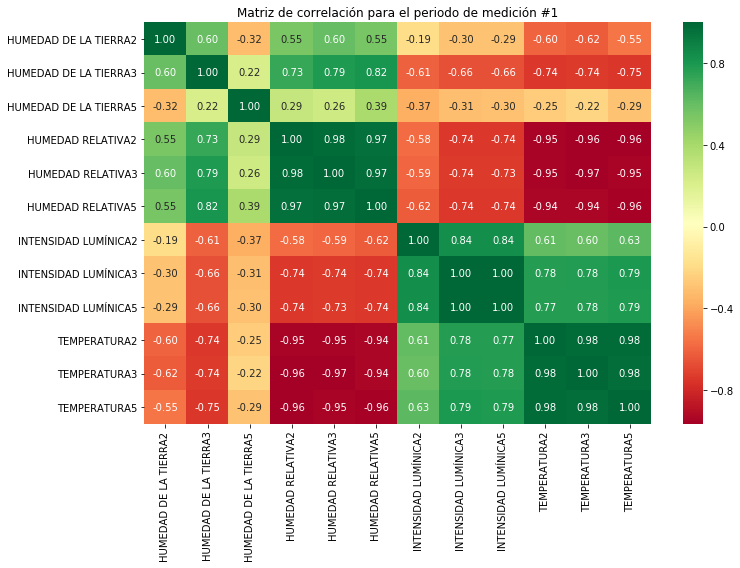

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

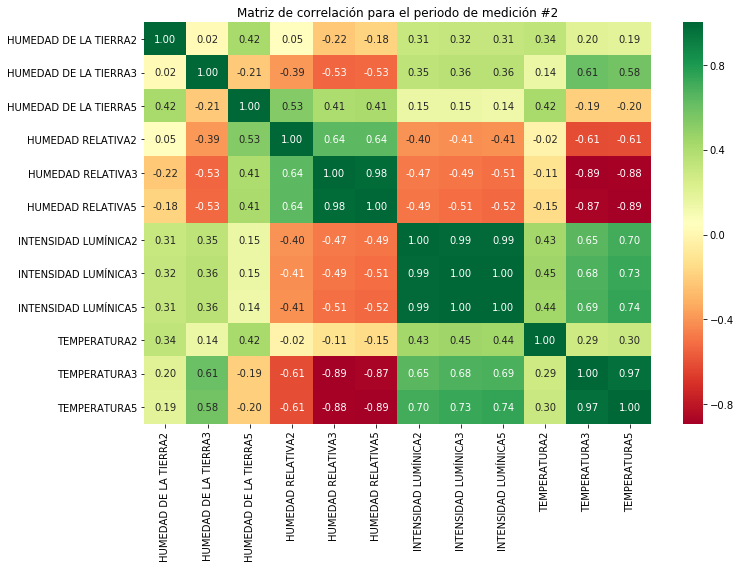

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

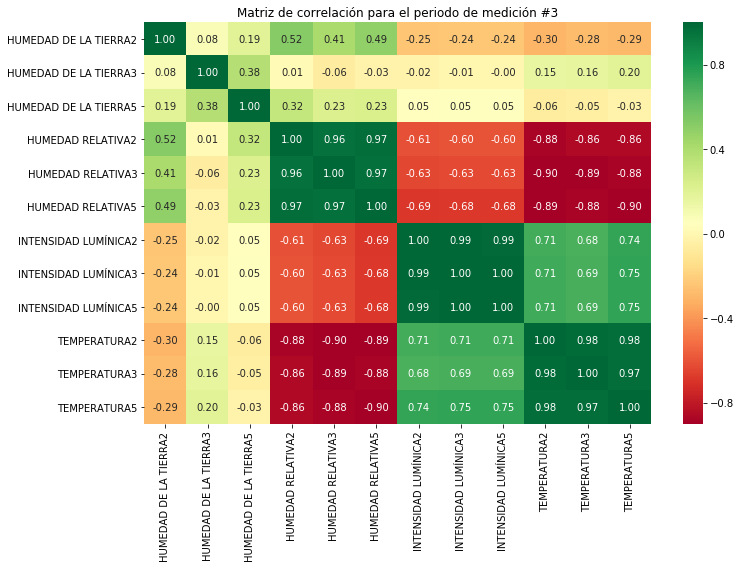

<Figure size 432x288 with 0 Axes>

In [5]:
for T in periodo:
    plt.figure()
    tcorr = periodo[T].corr()
    plt.figure(figsize=[11,8])
    plt.title('Matriz de correlación para el periodo de medición #%d'%T)
    sns.heatmap(tcorr, annot=True, cmap='RdYlGn',fmt=".2f")
    plt.tight_layout()
    plt.show()
    plt.savefig('p%d.png'%T,
                transparent=True,bbox_inches='tight')

La correlación entre las variables se hace más debil entre mayor es la cantidad de días en los que se registran valores.

A partir de los gráficos es posible deducir relaciones existentes entre las variables:
- Relación de proporcionaliad inversa entre la temperatura y la humedad relativa.
- Correlación positiva entre la humedad relativa y la humedad del suelo.
- Correspodencia de los valores máximos de intensidad lumínica con los ciclos positivos de temperatura.

Correlaciones positivas
- Temperatura - Intensidad Lumínica.
- Humedad Relativa - Humedad de la Tierra.
- Temperatura - Humedad de la Tierra.

Correlaciones negativas
- Temperatura - Humedad Relativa
- Temperatura - Humedad de la Tierra.
- Humedad Relativa - Intensidad Lumínica.

A continuación se realiza un grafico de matriz de correlación para visualizar mejor la relación entre las varibles.

### Normaliza las variables

In [6]:
df={}
for T in periodo:
    df[T] = periodo[T].copy()
    df[T].iloc[:,:] = StandardScaler().fit_transform(df[T].iloc[:,:])

### Matrices de covarianza de las variables para los tres periodos de medición

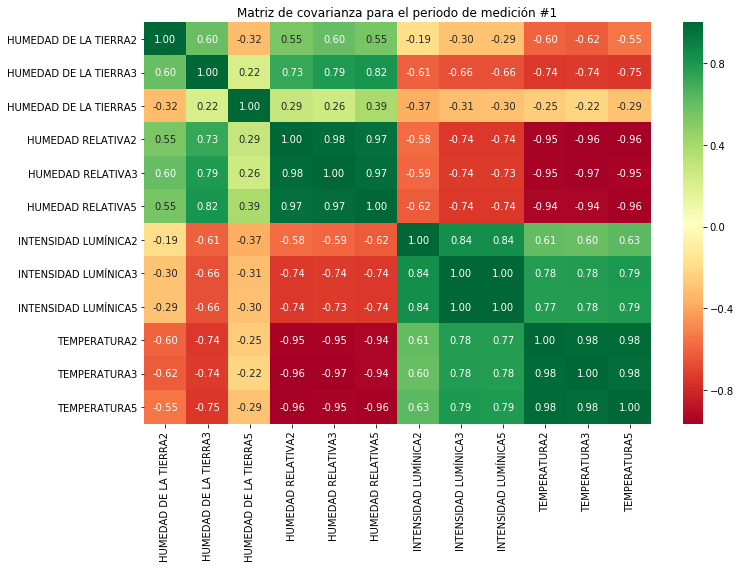

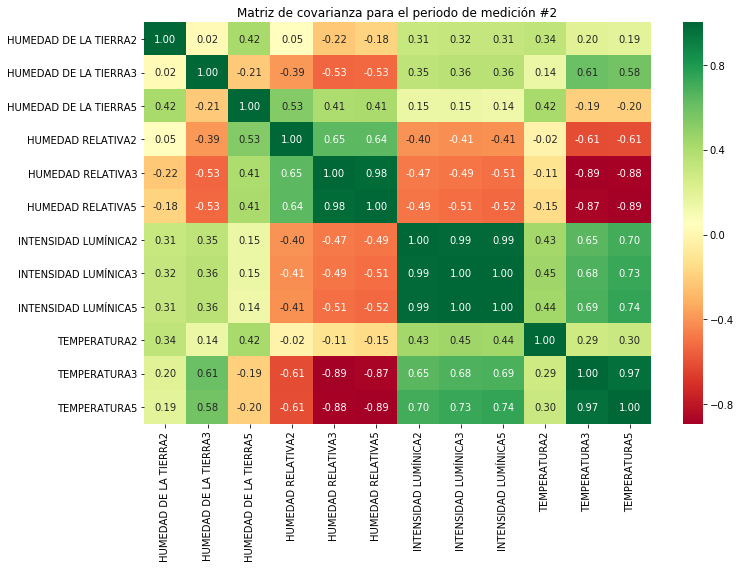

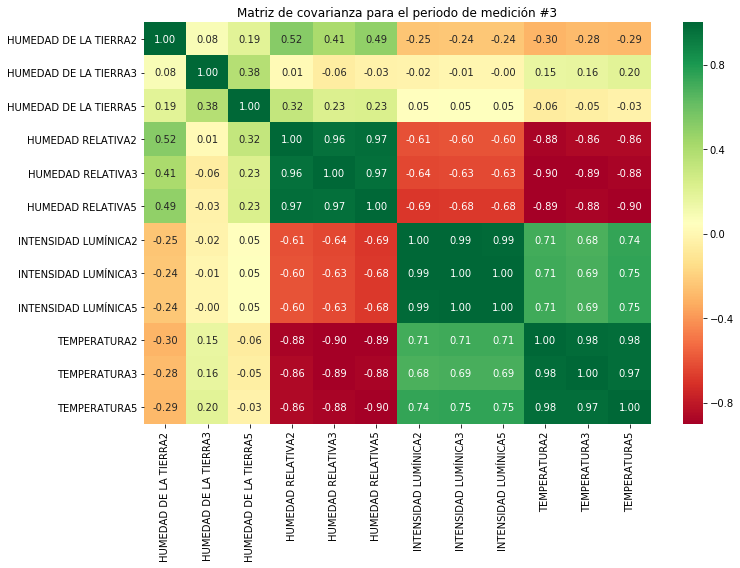

In [7]:
for T in df:
    tcov = df[T].cov()
    plt.figure(figsize=[11,8])
    plt.title('Matriz de covarianza para el periodo de medición #%d'%T)
    sns.heatmap(tcov, annot=True,cmap='RdYlGn',fmt=".2f")
    plt.tight_layout()
    plt.show()

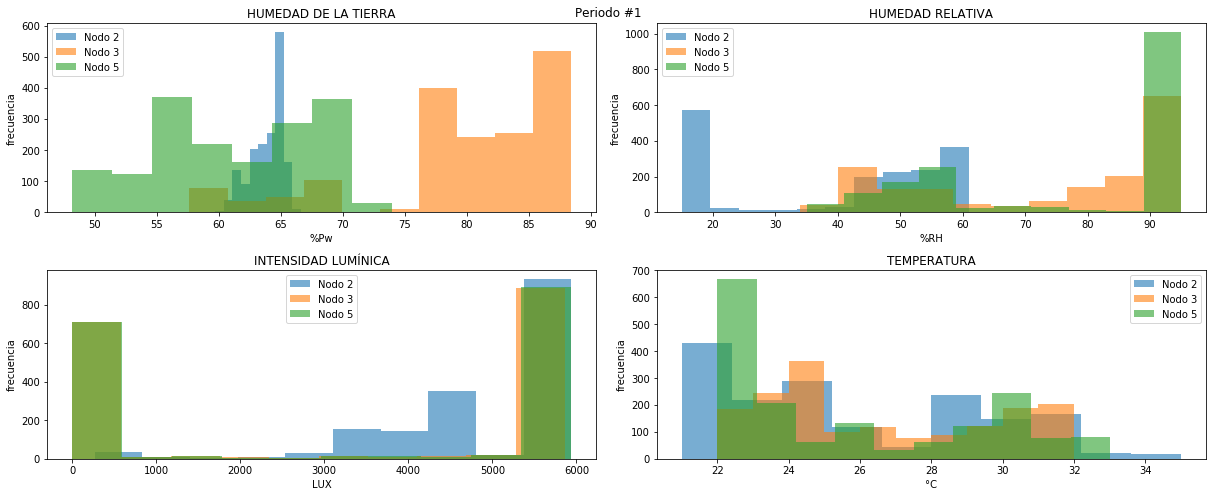

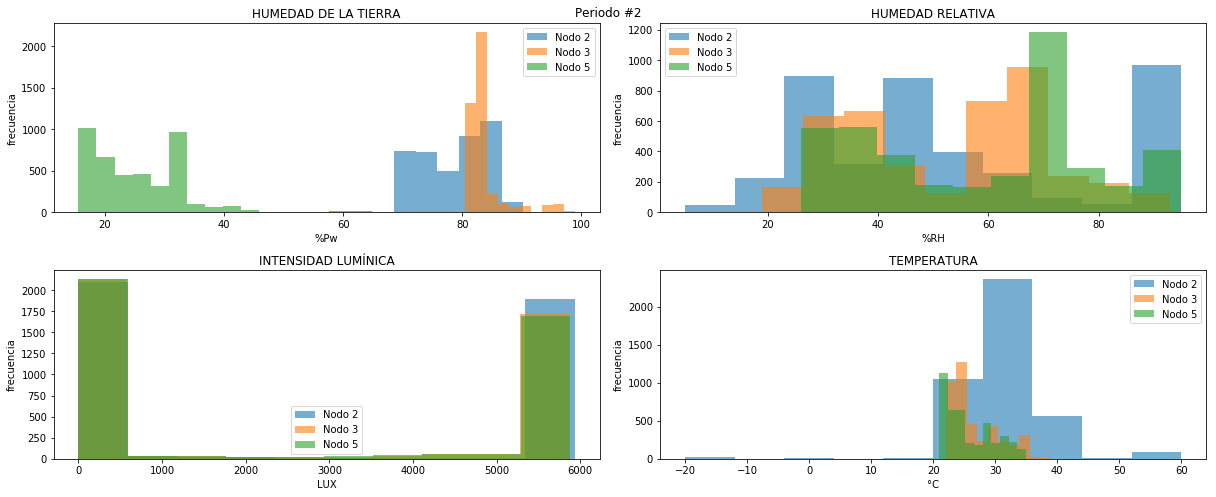

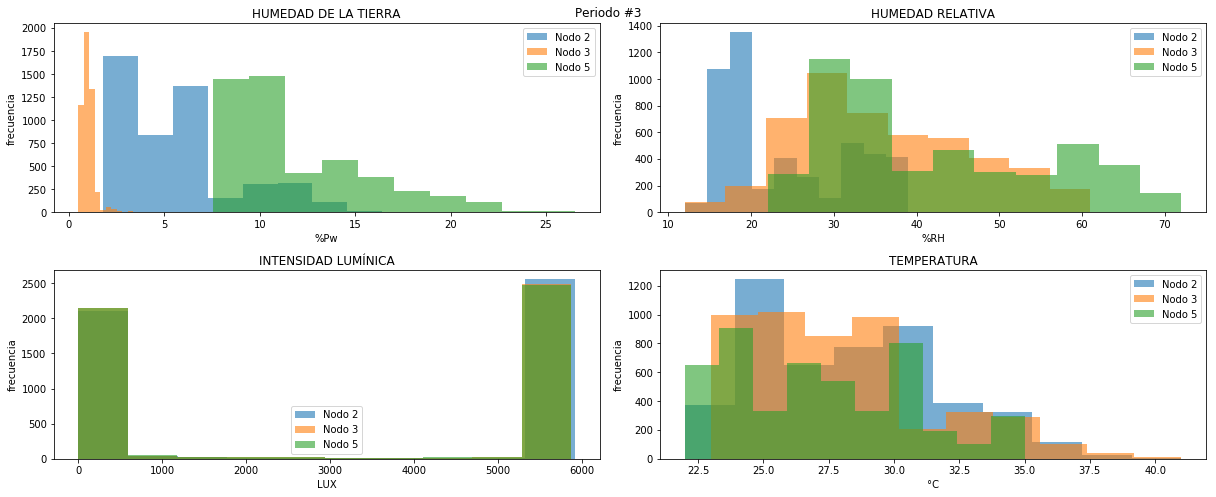

In [8]:
vars={'TEMPERATURA':'°C','HUMEDAD RELATIVA':'%RH',
      'HUMEDAD DE LA TIERRA':'%Pw', 'INTENSIDAD LUMÍNICA':'LUX'}

for T in periodo:    
    plt.figure(figsize=[17,7])
    plt.suptitle('Periodo #%d'%T)
    sub=221
    varia=0
    for var in periodo[1].columns:
        varia+=1
        if varia>3:
            sub+=1
            plt.subplot(str(sub))
            varia=1
        plt.subplot(str(sub))
        n=[x for x in ['2', '3', '5'] if x in var]
        nv=[var.strip(x) for x in ['2', '3', '5'] if x in var]
        plt.title(nv[0])
        plt.xlabel('%s'%(vars[nv[0]]))
        plt.ylabel('frecuencia')
        plt.hist(periodo[T][var], alpha=.6,label='Nodo %s'%n[0])
        plt.legend()
        plt.tight_layout()

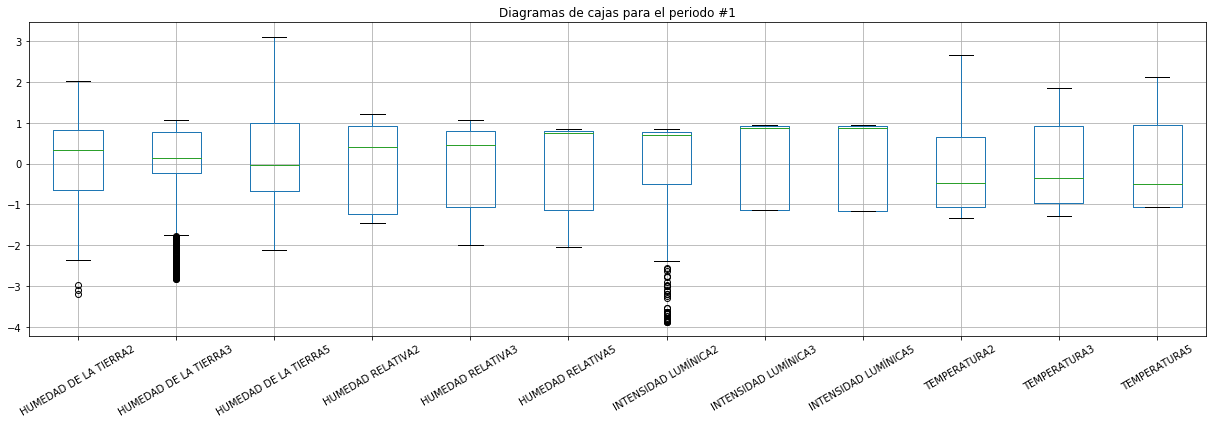

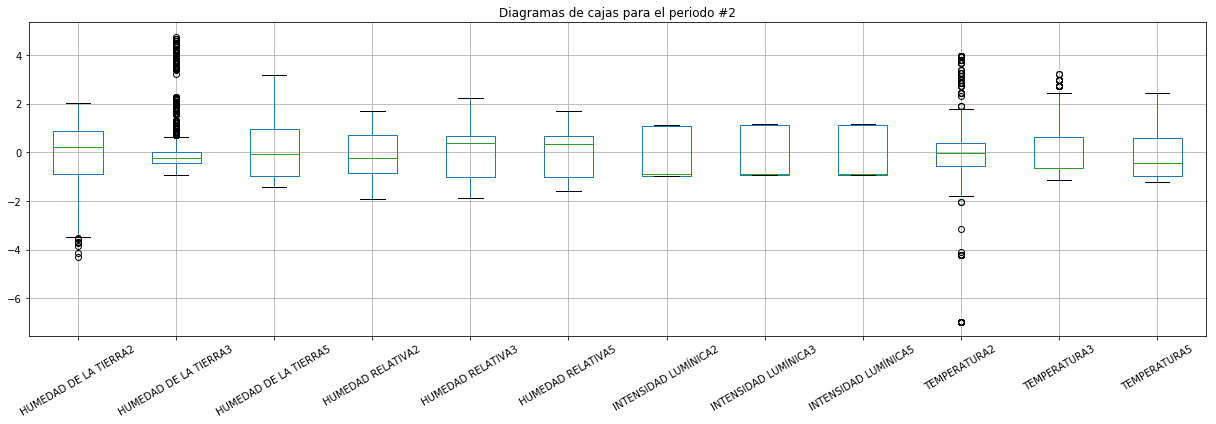

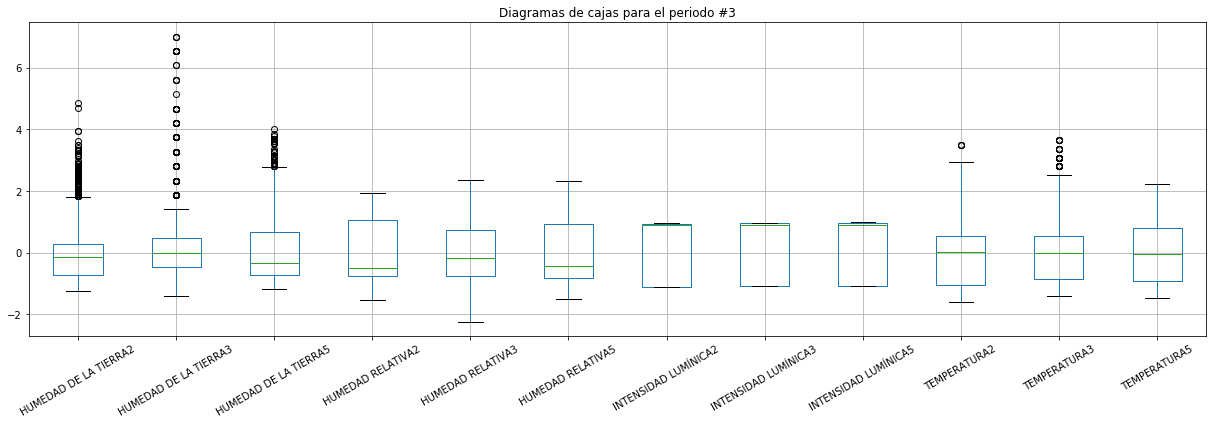

In [9]:
for T in periodo:
    plt.figure(figsize=[17,6])
    df[T].boxplot(rot=30)
    plt.title('Diagramas de cajas para el periodo #%d'%T)
    plt.tight_layout()

In [10]:
display('periodo 1',periodo[1].describe())
display('periodo 2',periodo[2].describe())
display('periodo 3',periodo[3].describe())

'periodo 1'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,63.943156,79.928859,61.246082,40.003546,73.870567,77.483452,4933.079196,3229.906619,3246.213948,25.693262,26.092790,25.695626
std,1.319795,7.908694,6.178277,17.177956,20.028168,20.909092,1205.376045,2817.614563,2825.632885,3.504648,3.191357,3.457801
min,59.720000,57.630000,48.160000,15.000000,34.000000,35.000000,269.000000,0.000000,0.000000,21.000000,22.000000,22.000000
25%,63.090000,78.020000,57.150000,19.000000,52.750000,54.000000,4322.000000,0.000000,0.000000,22.000000,23.000000,22.000000
50%,64.370000,81.070000,61.080000,47.000000,83.000000,93.000000,5771.000000,5703.000000,5706.000000,24.000000,25.000000,24.000000
75%,65.020000,86.040000,67.420000,56.000000,90.000000,94.000000,5870.000000,5818.000000,5829.000000,28.000000,29.000000,29.000000
max,66.620000,88.450000,80.420000,61.000000,95.000000,95.000000,5941.000000,5865.000000,5935.000000,35.000000,32.000000,33.000000


'periodo 2'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,78.682270,83.481609,24.945788,52.439148,52.969514,59.531575,2762.394387,2637.953787,2618.842971,31.087104,26.486813,25.694653
std,5.728865,3.238298,6.600022,24.785263,17.915515,20.941300,2865.700630,2809.718624,2795.763638,7.327405,3.874999,3.829013
min,54.100000,80.420000,15.580000,5.000000,19.000000,26.000000,0.000000,0.000000,0.000000,-20.000000,22.000000,21.000000
25%,73.680000,82.030000,18.630000,31.000000,35.000000,38.000000,0.000000,0.000000,0.000000,27.000000,24.000000,22.000000
50%,79.940000,82.670000,24.410000,47.000000,60.000000,67.000000,222.000000,93.000000,93.000000,31.000000,24.000000,24.000000
75%,83.630000,83.470000,31.150000,70.000000,65.000000,74.000000,5841.000000,5806.000000,5800.000000,34.000000,29.000000,28.000000
max,90.220000,98.880000,45.920000,95.000000,93.000000,95.000000,5935.000000,5865.000000,5876.000000,60.000000,39.000000,35.000000


'periodo 3'

,HUMEDAD DE LA TIERRA2,HUMEDAD DE LA TIERRA3,HUMEDAD DE LA TIERRA5,HUMEDAD RELATIVA2,HUMEDAD RELATIVA3,HUMEDAD RELATIVA5,INTENSIDAD LUMÍNICA2,INTENSIDAD LUMÍNICA3,INTENSIDAD LUMÍNICA5,TEMPERATURA2,TEMPERATURA3,TEMPERATURA5
count,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000
mean,5.536362,0.978074,11.833524,23.883586,35.980286,41.673169,3179.216435,3085.823407,3085.321228,27.960365,28.030504,27.199834
std,3.007139,0.343119,3.659801,7.769667,10.694512,13.095129,2862.609518,2841.480343,2843.673726,3.750617,3.556533,3.502610
min,1.780000,0.500000,7.560000,12.000000,12.000000,22.000000,0.000000,0.000000,0.000000,22.000000,23.000000,22.000000
25%,3.380000,0.820000,9.160000,18.000000,28.000000,31.000000,0.000000,0.000000,0.000000,24.000000,25.000000,24.000000
50%,5.150000,0.980000,10.610000,20.000000,34.000000,36.000000,5753.000000,5665.000000,5659.000000,28.000000,28.000000,27.000000
75%,6.430000,1.140000,14.300000,32.000000,44.000000,54.000000,5841.000000,5806.000000,5806.000000,30.000000,30.000000,30.000000
max,20.080000,3.380000,26.500000,39.000000,61.000000,72.000000,5912.000000,5865.000000,5870.000000,41.000000,41.000000,35.000000
